<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/20_Estimating_University_Admission_Probability_by_employing_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b63; overflow:hidden"><b> Estimating University Admission Probability by employing Multiple Linear Regression</b></div>


# Problem Statement

### This project involves developing a regression model to predict the likelihood of acceptance into a graduate program.

- Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions
- Citation: Mohan S Acharya, Asfia Armaan, Aneeta S Antony: "A Comparison of Regression Models for Prediction of Graduate Admissions," IEEE International Conference on Computational Intelligence in Data Science, 2019.
The dataset includes the following features:

- GRE Scores (maximum of 340)
   - TOEFL Scores (maximum of 120)
   - University Rating (maximum of 5)
   - Strength of the Statement of Purpose and Letters of Recommendation (maximum of 5)
   - Undergraduate GPA (maximum of 10)
   - Research Experience (binary: 0 or 1)
   - Probability of Admission (ranging from 0 to 1)

#

# *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#

# *2.Import Dataset*

In [ ]:
data=pd.read_csv('Desktop/ARTIFICIAL INTELLIGENT/Courses/ML Regression Course Package/6. Multiple Linear Regression/Admission.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#

# *3.Data analysis and Visualization*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [ ]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admission Chance,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
# visualization
n_data=data.drop(['Serial No.'], axis=1)
n_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
columns_headers=n_data.columns.values
columns_headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

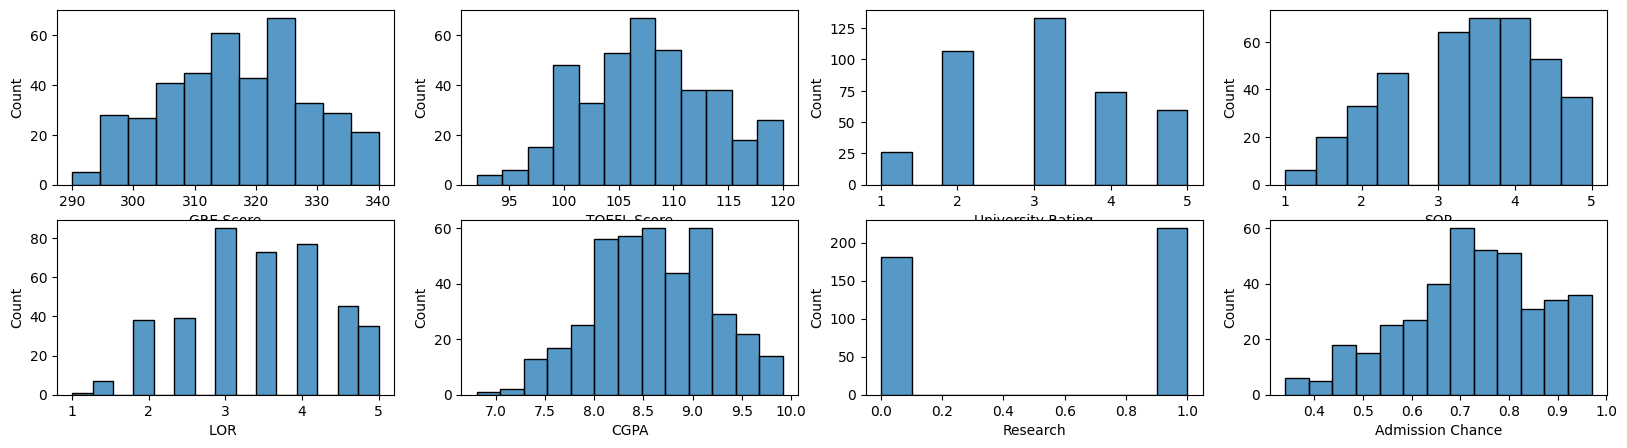

In [ ]:
i = 1
fig, ax = plt.subplots(2, 4, figsize=(20, 5))

for col in columns_headers:
    plt.subplot(2, 4, i)
    sns.histplot(data[col])
    i += 1

<Axes: >

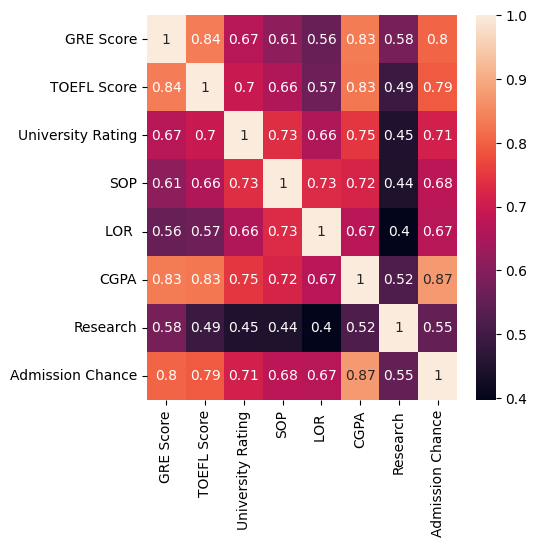

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(n_data.corr(),annot=True)

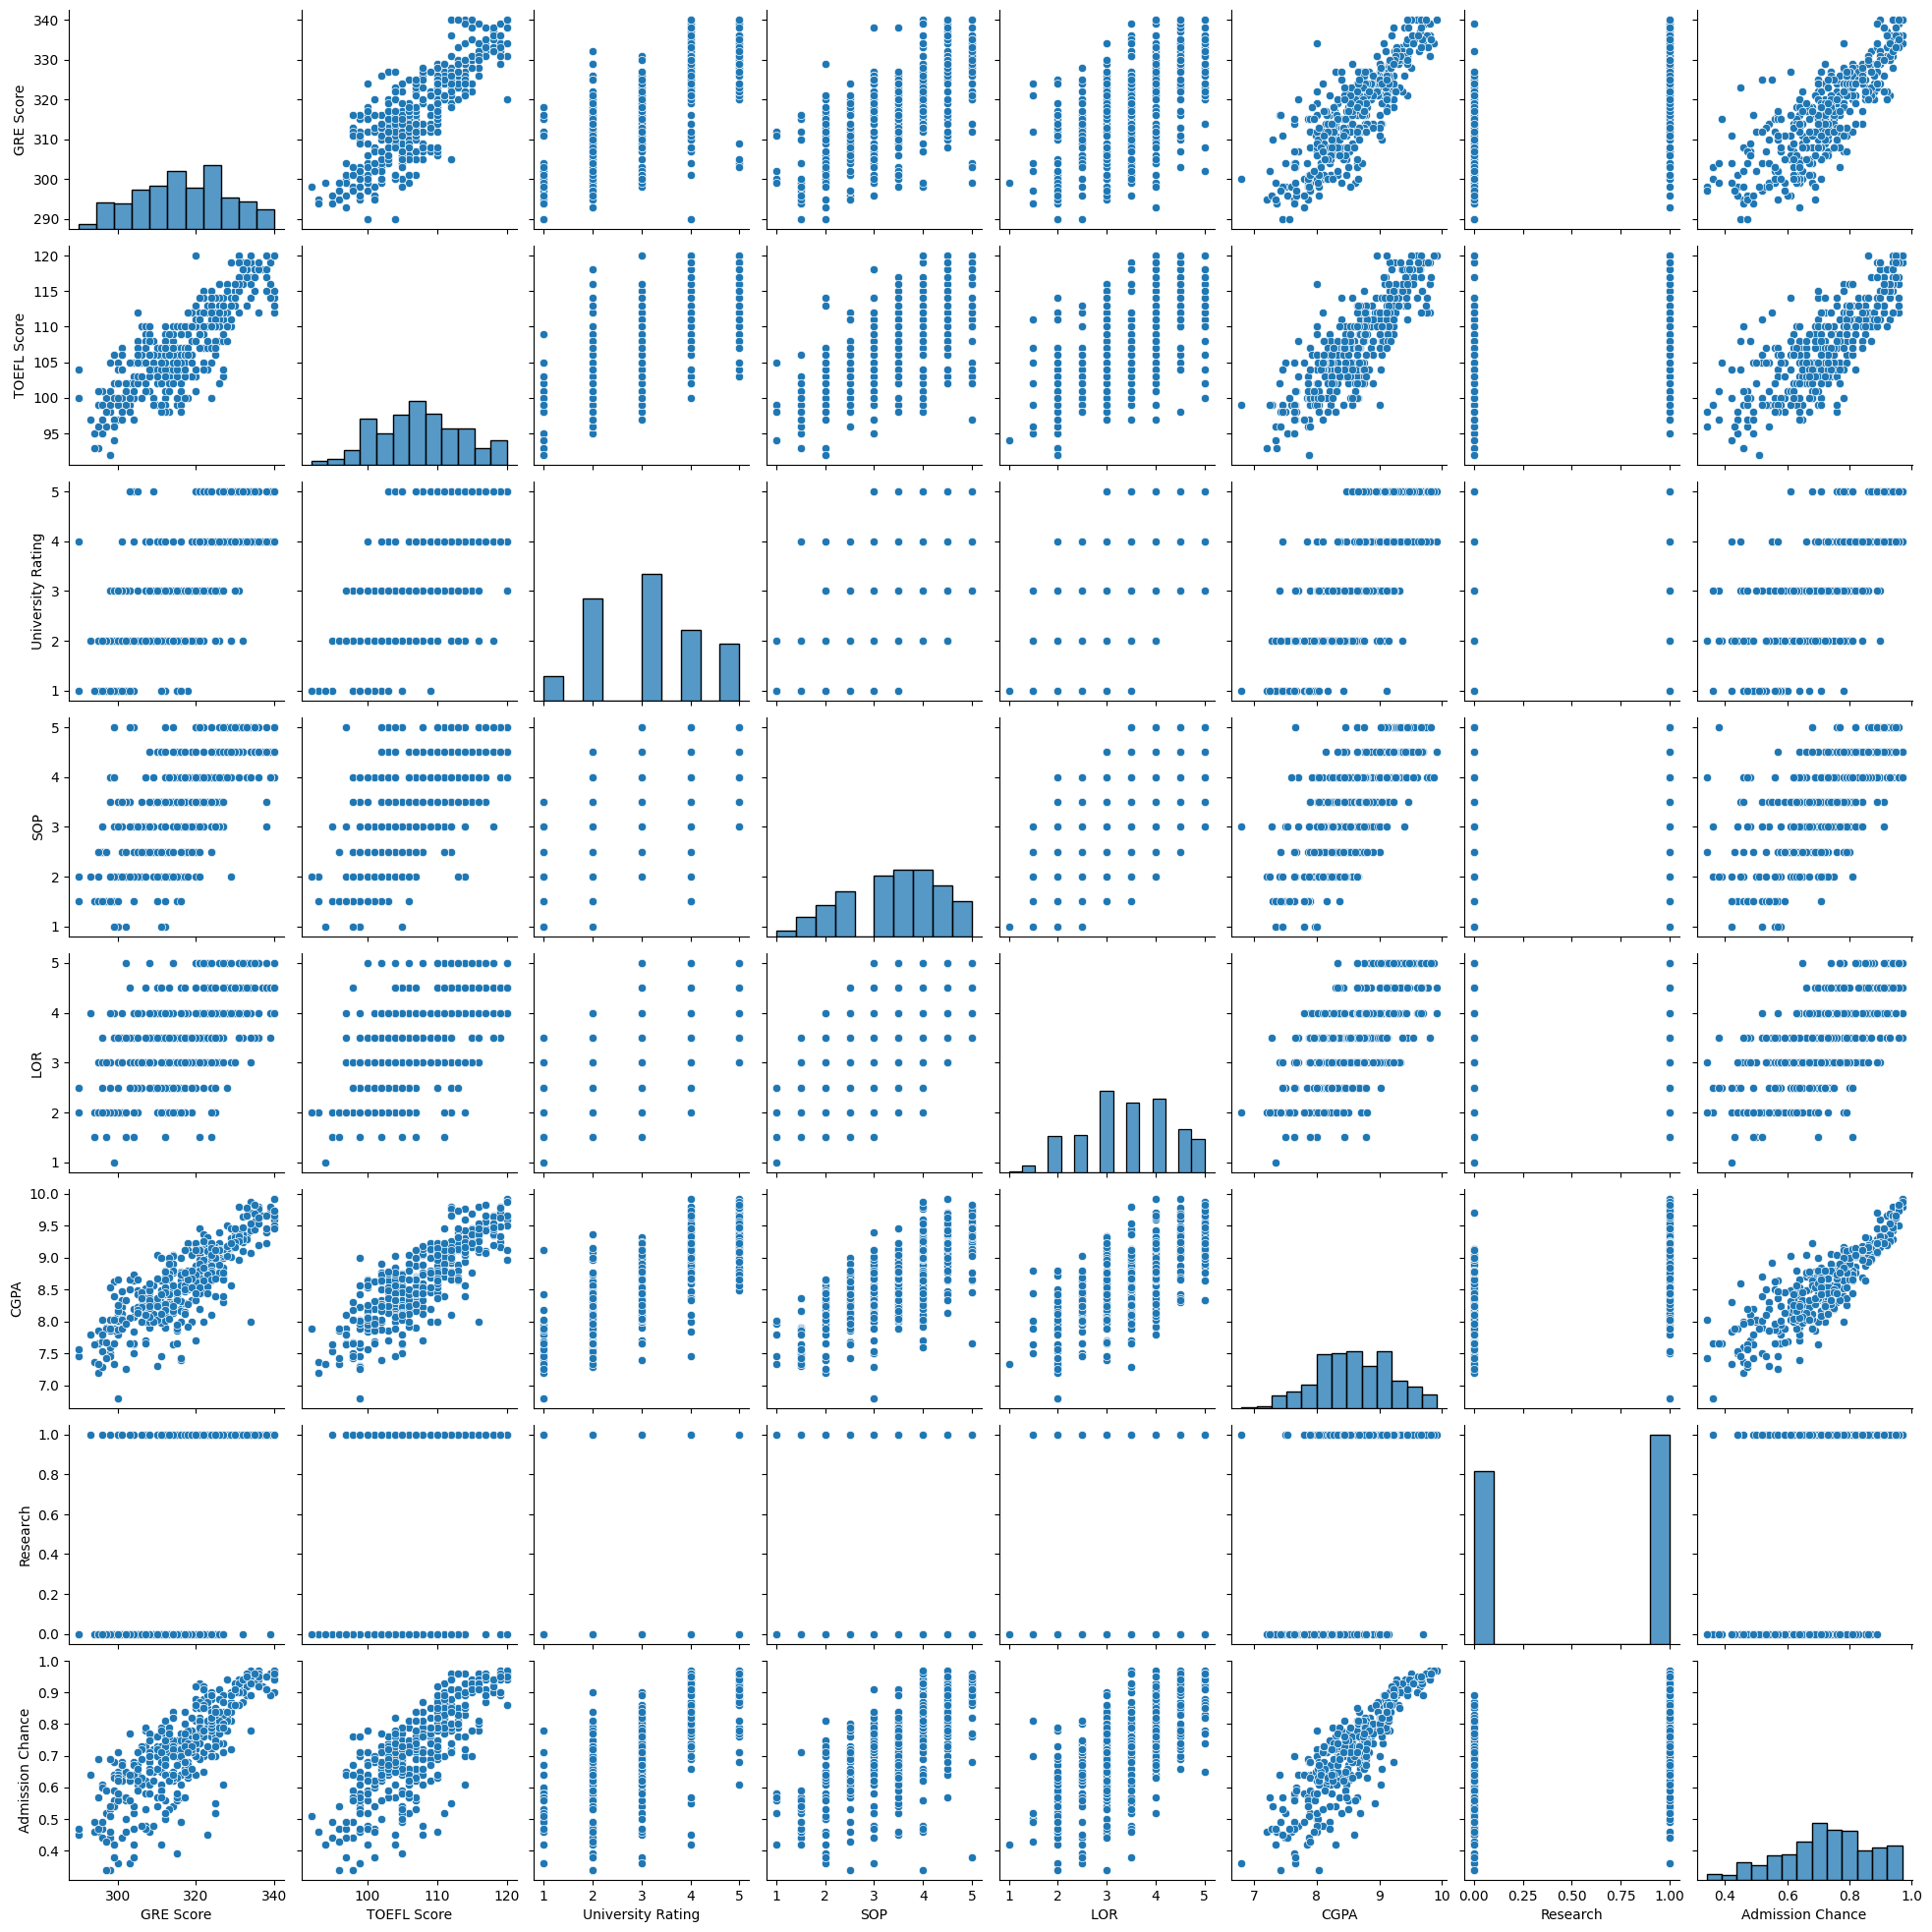

In [ ]:
sns.pairplot(n_data)

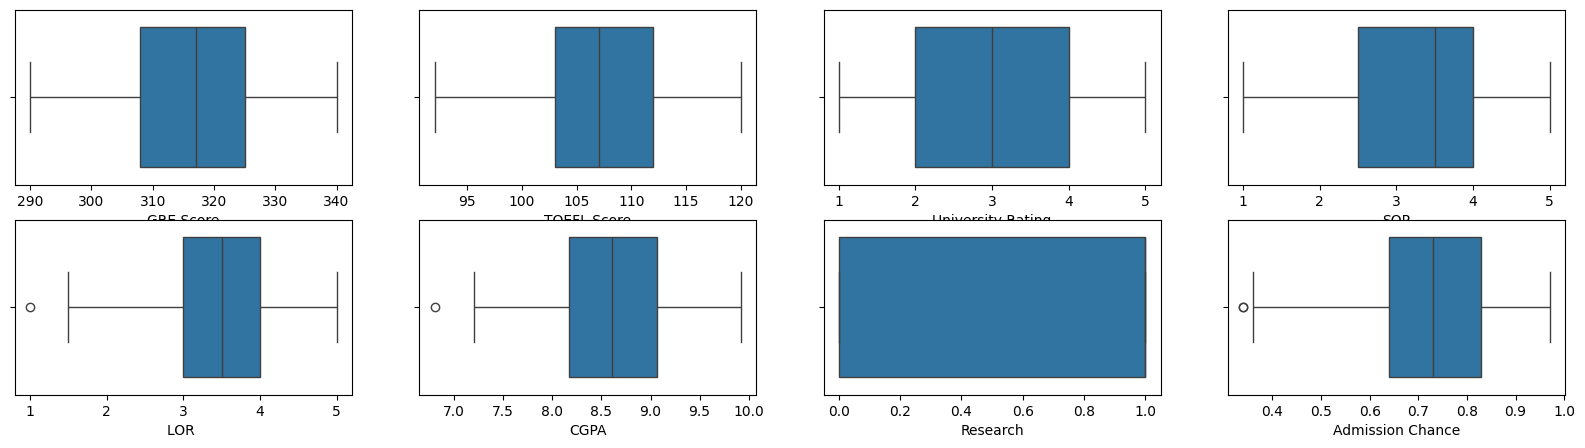

In [ ]:
p=1
fig,ax =plt.subplots(2,4,figsize=(20,5))

for cl in columns_headers:
    plt.subplot(2,4,p)
    sns.boxplot(x=n_data[cl])
    p += 1

#

# *4.Split data to train and test*

In [ ]:
from sklearn.model_selection import train_test_split

X=n_data.drop(['Admission Chance'],axis=1)
Y=n_data['Admission Chance']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(320, 7) (80, 7) (320,) (80,)


#

# *5. Train the Model*

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print( 'Models coefficients are :', model.coef_)
print( 'Models intercept is :', model.intercept_)

Models coefficients are : [ 0.00154407  0.00273348  0.00526728 -0.00236509  0.01850629  0.12600516
  0.02189205]
Models intercept is : -1.2242702320831915


#

# *6.Evaluate Model*

Text(0.5, 1.0, 'Actual vs Predicted values')

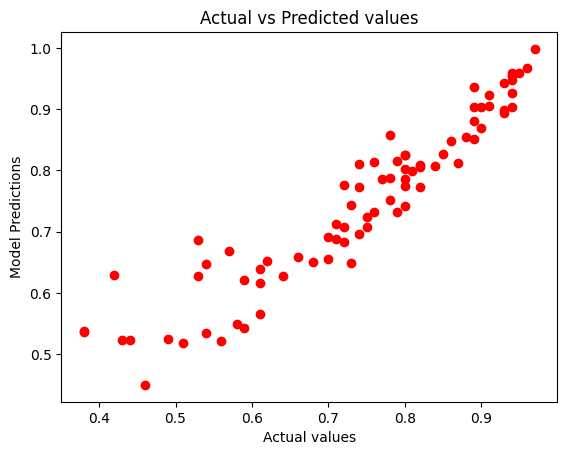

In [ ]:
y_pred= model.predict(X_test)

plt.scatter(Y_test,y_pred, color='r')
plt.ylabel('Model Predictions')
plt.xlabel('Actual values')
plt.title('Actual vs Predicted values')

# this graph demostrate us how model perfect is

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
k=X_test.shape[1]
n=len(X_test)



RMSE = float(format(np.sqrt(mean_squared_error(Y_test, y_pred)) , '.3f'))
MSE = mean_squared_error(Y_test, y_pred)
MAE = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((Y_test - y_pred) /Y_test ) ) * 100

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%')


RMSE = 0.055 
MSE = 0.0029925018048524545 
MAE = 0.03830649144498903 
R2 = 0.875062223886796 
Adjusted R2 = 0.8629154956535678 
Mean Absolute Percentage Error = 6.408941788298065 %


In [ ]:
# 3d visualization  of d

Text(0.5, 0, 'Acceptance Chance')

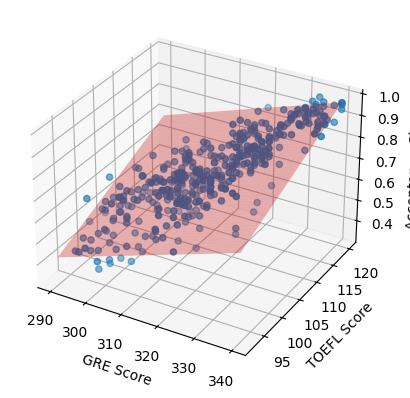

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

X = n_data[[ 'GRE Score', 'TOEFL Score' ]]
y = n_data['Admission Chance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

x_surf, y_surf = np.meshgrid(np.linspace(n_data['GRE Score'].min(), n_data['GRE Score'].max(), 100)  , np.linspace(n_data['TOEFL Score'].min(), n_data['TOEFL Score'].max(), 100)  )
onlyX = pd.DataFrame({'GRE Score': x_surf.ravel(), 'TOEFL Score':y_surf.ravel()})
fittedY = regressor.predict(onlyX)
fittedY = fittedY.reshape(x_surf.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(n_data['GRE Score'], n_data['TOEFL Score'], n_data['Admission Chance'])
ax.plot_surface(x_surf, y_surf, fittedY, color = 'r', alpha = 0.3)
ax.set_xlabel('GRE Score')
ax.set_ylabel('TOEFL Score')
ax.set_zlabel('Acceptance Chance')